In [1]:
#...... general imports

import numpy as np
import pickle
from helpers.SimulationAnalysis import SimulationAnalysis, readHlist
import matplotlib.pylab as plt
from tqdm import tqdm

#......new imports (helper class)
import sys
sys.path.insert(0, '../scripts') # adding to the system path
from hlistHelper import hlist # custom object

#...... plot formatting

%matplotlib inline
%config InlineBackend.figure_format='retina'
%config InlineBackend.rc = {'figure.facecolor': 'w'}
plt.rc("text", usetex=True)
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = 'cm'
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.transparent'] = True
plt.rcParams['figure.facecolor'] = (0.0, 0.0, 0.0, 0.0)



#...... colors 

custom_blues = ["#99DDFF","#66CCFF", "#33BBFF", "#00AAFF", "#0088CC", "#006699", "#004466", "#000000"]
custom_blues_complement = ["#FFBB99", "#FF9966", "#FF7733", "#FF5500", "#CC4400", "#993300", "#662200","#000000"]
custom_cet_fdm = ["#EE99FF","#E566FF","#DD33FF","#D400FF","#AA00CC","#7F0099"]
#["#fc5eff","#e330ff","#b11eff"]

sim_colors = {}
sim_colors['cdm'] = 'k'
sim_colors['vd100'] = 'm'
sim_colors['wdm_3.5'] = custom_blues_complement[1]
sim_colors['wdm_6.5'] = custom_blues_complement[4]
sim_colors['Tkd_0.72kev'] = 'teal'
sim_colors['Tkd_0.72kev_vd100'] = 'teal'
sim_colors['Tkd_1.46kev'] = 'goldenrod'
sim_colors['Tkd_1.46kev_vd100'] = 'goldenrod'
sim_colors['Tkd_2.32kev'] = 'brown'
sim_colors['Tkd_2.32kev_vd100'] = 'brown'

sim_colors['wdm_3'] = custom_blues_complement[0]
sim_colors['wdm_4'] = custom_blues_complement[1]
sim_colors['wdm_5'] = custom_blues_complement[2]
sim_colors['wdm_6'] = custom_blues_complement[3]
sim_colors['wdm_6.5'] = custom_blues_complement[4]
sim_colors['wdm_10'] = custom_blues_complement[5]
sim_colors['idm_1e-4GeV'] = custom_blues[0]
sim_colors['idm_1e-2GeV'] = custom_blues[2]
sim_colors['idm_1GeV'] = custom_blues[4]
sim_colors['fdm_25.9e-22eV'] = custom_cet_fdm[0]
sim_colors['fdm_69.4e-22eV'] = custom_cet_fdm[1]
sim_colors['fdm_113e-22eV'] = custom_cet_fdm[2]
sim_colors['fdm_151e-22eV'] = custom_cet_fdm[3]
sim_colors['fdm_185e-22eV'] = custom_cet_fdm[4]
sim_colors['fdm_490e-22eV'] = custom_cet_fdm[5]

## goals

check how the main-branch progenitor reported by consistent-trees looks at the redshifts in question — in terms of mass, a scatterplot of halos and subhalos at that redshift, etc. 

the next step would be to track the mergers that progenitor experienced — we could look at the non-normalized mass accretion history to see if there’s a jump around then, and then look for objects that merge onto the main branch using the progenitor and descendant IDs in the halo catalog

In [7]:
halo_id = 'Halo023'
model = 'cdm'

dm = hlist(model=model, halo_id=halo_id)
dm.load_hmb()
dm.load_hlists()

True

100%|██████████| 236/236 [03:49<00:00,  1.03it/s]


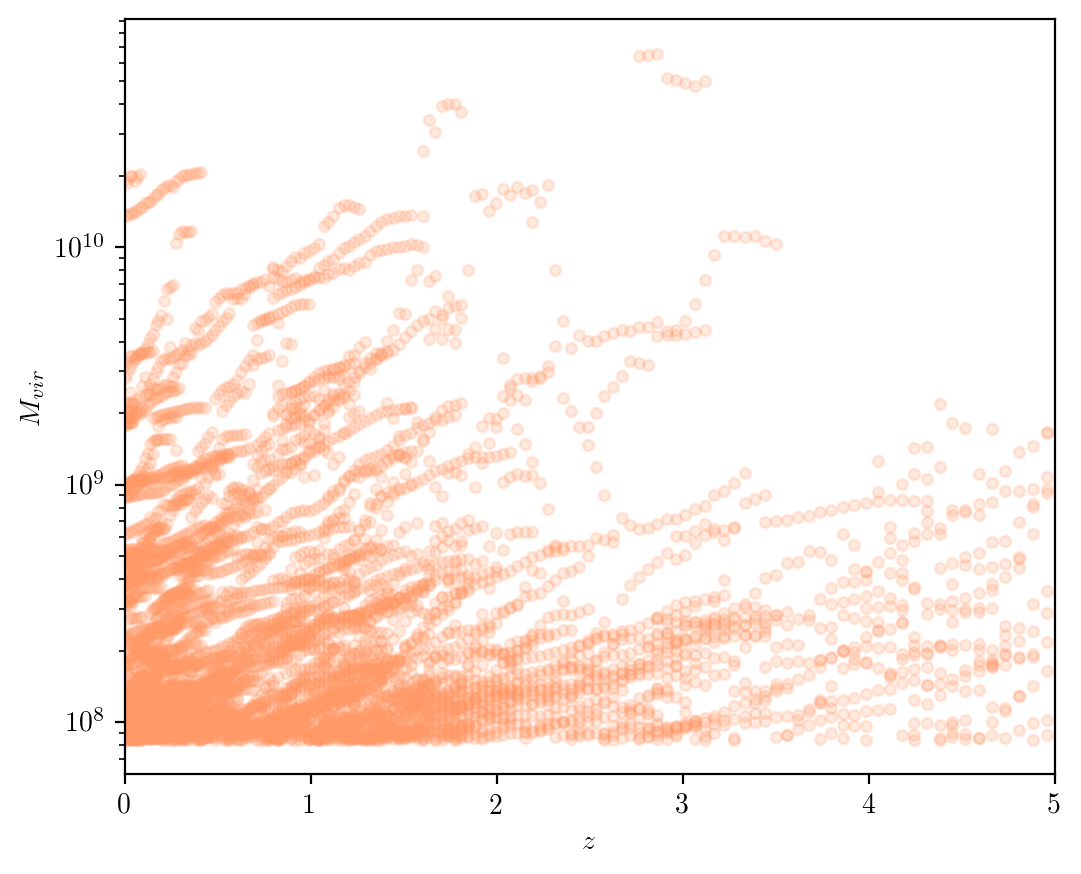

In [18]:
plt.figure(figsize=(6,5))

for z in tqdm((1/dm.hmb['scale']) - 1):
    
    isolated, subhalos = dm.get_z(z)
    mass_cut = subhalos['Mvir']/0.7 > 1.2e8
    plt.scatter(z * np.ones(subhalos[mass_cut].shape), subhalos[mass_cut]['Mvir'], color=sim_colors['wdm_4'], alpha = 0.2, s = 15)
    
plt.xlabel('$z$')
plt.ylabel('$M_{vir}$')
plt.xlim(0, 5)
plt.yscale('log')